In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.external as sce
import seaborn as sns
from matplotlib.pyplot import rc_context


In [2]:
import scipy.stats
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import weibull_min
from scipy.stats import weibull_max
from scipy.stats import pearsonr

In [8]:
rna=sc.read('rna_analyzed.h5')
data=sc.read('3data_raw.h5')

In [9]:
rna.uns['log1p']["base"] = None

In [10]:
sc.pp.log1p(data)

In [11]:
rna.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample,leiden,Ig,IgL,IgH,sec
AAACCCAAGTACTGTC-1-0,3128,3128,21325.0,909.0,4.262603,0,1,G,kappa,G1,x
AAACCCAAGTGAATAC-1-0,1774,1774,6060.0,518.0,8.547854,0,3,M,kappa,M,x
AAACCCAGTCCACAGC-1-0,2914,2914,19771.0,792.0,4.005867,0,1,G,kappa,G1,hi
AAACCCATCACAGTGT-1-0,3122,3122,12608.0,757.0,6.004125,0,1,M,kappa,M,hi
AAACCCATCCCTCTCC-1-0,3021,3021,16684.0,247.0,1.480460,0,1,G,kappa,G1,hi
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGACTCCT-1-2,2467,2467,14874.0,309.0,2.077451,2,7,M,lambda,M,x
TTTGTTGAGGTACAAT-1-2,2159,2159,14240.0,170.0,1.193820,2,7,M,lambda,M,x
TTTGTTGAGTAACGAT-1-2,2665,2665,18230.0,674.0,3.697202,2,5,A,kappa,A,lo
TTTGTTGCACGTTGGC-1-2,2211,2211,19481.0,384.0,1.971151,2,5,A,kappa,A,lo


In [12]:
data.obs['leiden']=rna.obs['leiden']
data.obs['Ig']=rna.obs['Ig']
data.obs['IgL']=rna.obs['IgL']
data.obs['IgH']=rna.obs['IgH']
data.obs['sec']=rna.obs['sec']


In [13]:
sc.tl.diffmap(rna)


In [14]:
sc.tl.paga(rna, groups='leiden')


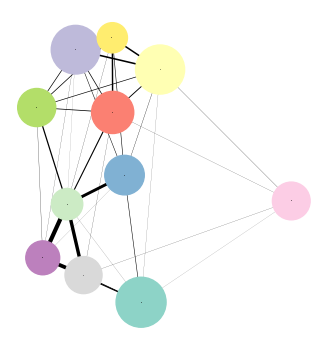

In [15]:
with rc_context({'figure.figsize': (4, 4),'axes.labelsize': False,'axes.titlesize':False}):
    sc.pl.paga(rna, threshold=0.02, show=False, frameon=False,node_size_scale=5,edge_width_scale=0.4,fontsize=0)
#     plt.savefig('paga.pdf')

In [16]:
sc.tl.draw_graph(rna, init_pos='paga')


In [17]:
rna.uns['iroot'] = np.flatnonzero(rna.obs['leiden']  == '6')[0]


In [18]:
sc.tl.dpt(rna)


In [19]:
rna.obs['distance'] = rna.obs['dpt_pseudotime']


/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


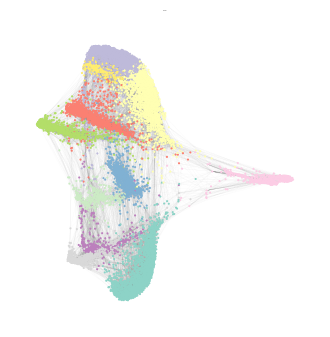

In [20]:
with rc_context({'figure.figsize': (4, 4),'axes.labelsize': False,'axes.titlesize':False}):

    ax=sc.pl.draw_graph(rna, color=['leiden'], legend_loc='None',frameon=False,edges=True, edges_width=0.01,)
#     ax.view_init(90,angle)

    plt.show()
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     ax.set_title('')

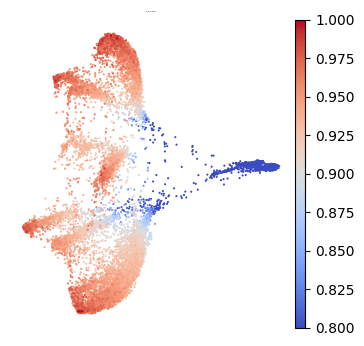

In [21]:
with rc_context({'figure.figsize': (4, 4),'axes.labelsize': False,'axes.titlesize':False}):
    ax = plt.gca()
    ax.invert_yaxis()
#     ax = sc.pl.draw_graph(rna, size=20, show=False)
    sc.pl.draw_graph(rna, color=['dpt_pseudotime'], legend_loc='None',frameon=False,vmin=0.8,ax=ax,cmap='coolwarm')
    
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     ax.set_title('')
    

In [22]:
# create a list of our conditions
conditions = [

    (rna.obs['distance'] > 0.85) & (rna.obs['distance'] <= 0.9),
    (rna.obs['distance'] > 0.875) & (rna.obs['distance'] <= 0.925), 
    (rna.obs['distance'] > 0.90) & (rna.obs['distance'] <= 0.95),
    (rna.obs['distance'] > 0.925) & (rna.obs['distance'] <= 0.975),
    (rna.obs['distance'] > 0.95) & (rna.obs['distance'] <= 1),
]


    

# create a list of the values we want to assign for each condition
values = ['t0', 't1', 't2', 't3','t4']

# create a new column and use np.select to assign values to it using our lists as arguments

rna.obs['time3'] = np.select(conditions, values)

In [23]:
s0=rna[rna.obs['sample']=='0']
s1=rna[rna.obs['sample']=='1']
s2=rna[rna.obs['sample']=='2']


In [24]:
s0.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sample,leiden,Ig,IgL,IgH,sec,dpt_pseudotime,distance,time3
AAACCCAAGTACTGTC-1-0,3128,3128,21325.0,909.0,4.262603,0,1,G,kappa,G1,x,0.884598,0.884598,t0
AAACCCAAGTGAATAC-1-0,1774,1774,6060.0,518.0,8.547854,0,3,M,kappa,M,x,0.933550,0.933550,t2
AAACCCAGTCCACAGC-1-0,2914,2914,19771.0,792.0,4.005867,0,1,G,kappa,G1,hi,0.906660,0.906660,t1
AAACCCATCACAGTGT-1-0,3122,3122,12608.0,757.0,6.004125,0,1,M,kappa,M,hi,0.783143,0.783143,0
AAACCCATCCCTCTCC-1-0,3021,3021,16684.0,247.0,1.480460,0,1,G,kappa,G1,hi,0.892744,0.892744,t0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGTTTCAG-1-0,2891,2891,25375.0,486.0,1.915271,0,1,G,kappa,G1,lo,0.919101,0.919101,t1
TTTGTTGCATCGTGGC-1-0,2468,2468,14817.0,565.0,3.813187,0,1,G,kappa,G1,lo,0.908852,0.908852,t1
TTTGTTGCATTGCTTT-1-0,1820,1820,10313.0,337.0,3.267720,0,1,G,kappa,G1,lo,0.929972,0.929972,t2
TTTGTTGGTACTGAGG-1-0,2230,2230,10912.0,282.0,2.584311,0,5,A,kappa,A,lo,0.807950,0.807950,0


In [25]:
d0=s0.obs
dd0=d0.groupby('time3')['sec'].value_counts(normalize=True).unstack('time3')
# al=d['sec'].value_counts(normalize=True)
# dd['al']= al
dd0
arr0=dd0.iloc[0]


In [26]:
d1=s1.obs
dd1=d1.groupby('time3')['sec'].value_counts(normalize=True).unstack('time3')
# al=d['sec'].value_counts(normalize=True)
# dd['al']= al
dd1
arr1=dd1.iloc[0][1:]


In [27]:
d2=s2.obs
dd2=d2.groupby('time3')['sec'].value_counts(normalize=True).unstack('time3')
# al=d['sec'].value_counts(normalize=True)
# dd['al']= al
dd2

arr2=dd2.iloc[0][1:]

In [28]:
x='Pseudotime'
y='IgG_ADT'
z='Sec'
c='leiden'

dt0 = pd.DataFrame( {x:s0.obs.distance, y:s0.raw.obs_vector('IgG_ADT'), z:s0.obs.sec,c:s0.obs.leiden})
dt1 = pd.DataFrame( {x:s1.obs.distance, y:s1.raw.obs_vector('IgG_ADT'), z:s1.obs.sec,c:s1.obs.leiden})
dt2 = pd.DataFrame( {x:s2.obs.distance, y:s2.raw.obs_vector('IgG_ADT'), z:s2.obs.sec,c:s2.obs.leiden})



In [29]:
dt0=dt0.sort_values(by='Pseudotime')
dt1=dt1.sort_values(by='Pseudotime')
dt2=dt2.sort_values(by='Pseudotime')

In [30]:
(vmin0,vmin1,vmin2)=(5.010612964630127, 3.97029185295105, 5.686284732818604)

In [31]:
dt0

,Pseudotime,IgG_ADT,Sec,leiden
AAACGCTAGTCACGCC-1-0,0.000000,3.091043,lo,6
GGAGGTACAACATACC-1-0,0.040343,3.496508,lo,6
CTATCCGGTCGGCTAC-1-0,0.042258,3.367296,lo,6
TCTACCGGTCGCATCG-1-0,0.046464,4.394449,lo,6
GAGTCTAGTGGCTTAT-1-0,0.047815,3.828641,lo,6
...,...,...,...,...
TGATCTTTCCCTCGAT-1-0,0.978936,4.736198,x,0
GGAATGGAGACATAGT-1-0,0.980570,3.970292,lo,0
GTCGTTCAGACGCATG-1-0,0.980814,4.477337,lo,0
TTGCTGCAGTCCTACA-1-0,0.981021,5.105946,hi,0


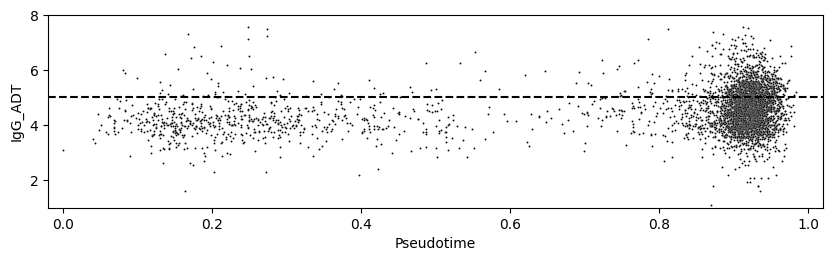

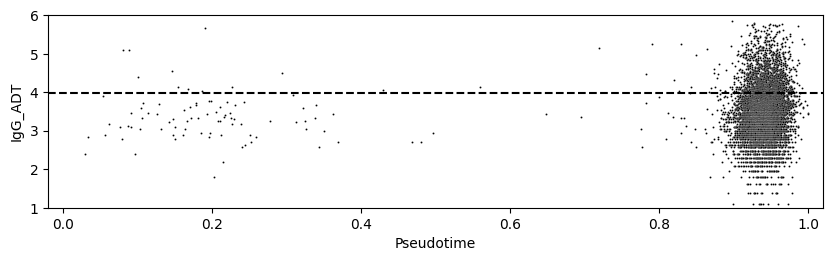

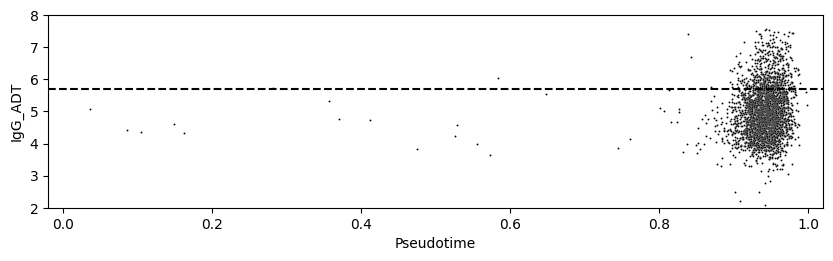

In [32]:
# t=[0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
fig = plt.figure(figsize=(10,2.5))

sns.scatterplot(data=dt0, x="Pseudotime", y="IgG_ADT",  c='k',s=2)
plt.legend('',frameon=False)
plt.ylim(1,8)
plt.xlim(-0.02,1.02)

# plt.axvline(x=0.85, c='red')
plt.axhline(y=vmin0,c='k',linestyle='--')


fig = plt.figure(figsize=(10,2.5))

sns.scatterplot(data=dt1, x="Pseudotime", y="IgG_ADT",  c="k", s=2)
plt.legend('',frameon=False)
plt.ylim(1,6)
# plt.xlim(0,1)
plt.xlim(-0.02,1.02)

# plt.axvline(x=0.85, c='red')
plt.axhline(y=vmin1,c='k',linestyle='--')

fig = plt.figure(figsize=(10,2.5))

sns.scatterplot(data=dt2, x="Pseudotime", y="IgG_ADT", c="k",s=2)

plt.ylim(2,8)
# plt.xlim(0,1)
plt.xlim(-0.02,1.02)

# sns.scatterplot(data=dt1, x="Pseudotime", y="IgG_ADT", hue="Sec", palette={'hi':'red','lo':'skyblue','x':'grey'})

# sns.scatterplot(data=dt2[dt2['Pseudotime']>0.8], x="Pseudotime", y="IgG_ADT", hue="Sec", palette={'hi':'red','lo':'skyblue','x':'grey'},alpha=0.5)
# sns.lmplot(data=dt2[dt2['Pseudotime']>0.8], x="Pseudotime", y="IgG_ADT",  palette={'hi':'red','lo':'skyblue','x':'grey'})
plt.legend('',frameon=False)
# plt.axvline(x=0.85, c='red')
plt.axhline(y=vmin2,c='k',linestyle='--')
plt.show()
# plt.plot(t,arr0)
# plt.plot(t,arr1)
# plt.xlim(0.50,1)

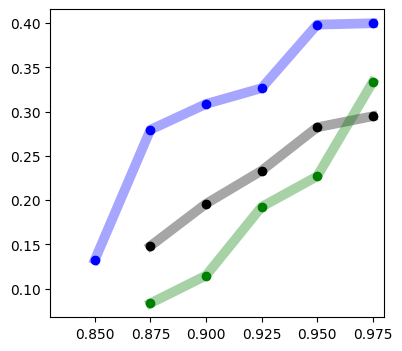

In [33]:
t0=[0.85,0.875,0.9,0.925,0.95,0.975]
t1=[0.875,0.9,0.925,0.95,0.975]
t2=[0.875,0.9,0.925,0.95,0.975]
fig = plt.figure(figsize=(4.3,4))

plt.scatter(t0,arr0,color='b')
plt.scatter(t1,arr1,color='k')
plt.scatter(t2,arr2,color='green')
plt.plot(t0,arr0,color='b',linewidth=7,alpha=0.35)
plt.plot(t1,arr1,color='k',linewidth=7,alpha=0.35)
plt.plot(t2,arr2,color='green',linewidth=7,alpha=0.35)
plt.xlim(0.83,0.98)
plt.show()

In [34]:
def df_rank_genes_groups(data, group, pval_cutoff : float= None, logfc_cutoff =None):
    df = pd.DataFrame() 
    for k in ['scores', 'names', 'logfoldchanges', 'pvals', 'pvals_adj']: 
        df[k] = data.uns["rank_genes_groups"][k][group] 
    if pval_cutoff is not None: 
        df = df[df["pvals_adj"] < pval_cutoff] 
    if logfc_cutoff is not None: 
        df = df[df["logfoldchanges"].abs() > logfc_cutoff] 


    return df


In [35]:
dfex=data[data.obs.sec!='x']
# dfex0=dfex[dfex.obs['sample']=='0']
# dfex1=dfex[dfex.obs['sample']=='1']
# dfex2=dfex[dfex.obs['sample']=='2']

In [13]:
# sc.tl.rank_genes_groups(dfex, 'sec', method='wilcoxon')
# sc.tl.rank_genes_groups(dfex0, 'sec', method='wilcoxon')
# sc.tl.rank_genes_groups(dfex1, 'sec', method='wilcoxon')
# sc.tl.rank_genes_groups(dfex2, 'sec', method='wilcoxon')

In [ ]:
# dfex_=df_rank_genes_groups(dfex,'hi')
# dfex_0=df_rank_genes_groups(dfex0,'hi')
# dfex_1=df_rank_genes_groups(dfex1,'hi')
# dfex_2=df_rank_genes_groups(dfex2,'hi')
# dfex_ex0=dfex_[dfex_['logfoldchanges']!=0]
# dfex_0ex0=dfex_0[dfex_0['logfoldchanges']!=0]
# dfex_1ex0=dfex_1[dfex_1['logfoldchanges']!=0]
# dfex_2ex0=dfex_2[dfex_2['logfoldchanges']!=0]


In [ ]:
# dfex_ex0.to_csv('dfex.csv')
# dfex_0ex0.to_csv('dfex0.csv')
# dfex_1ex0.to_csv('dfex1.csv')
# dfex_2ex0.to_csv('dfex2.csv')

In [36]:
#select IgG cells for DEG
dfG=dfex[dfex.obs['Ig']=='G']
dfG0=dfG[dfG.obs['sample']=='0']
dfG1=dfG[dfG.obs['sample']=='1']
dfG2=dfG[dfG.obs['sample']=='2']

In [37]:
sc.tl.rank_genes_groups(dfG, 'sec', method='wilcoxon')
sc.tl.rank_genes_groups(dfG0, 'sec', method='wilcoxon')
sc.tl.rank_genes_groups(dfG1, 'sec', method='wilcoxon')
sc.tl.rank_genes_groups(dfG2, 'sec', method='wilcoxon')

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [38]:
dfG_=df_rank_genes_groups(dfG,'hi')
dfG0_=df_rank_genes_groups(dfG0,'hi')
dfG1_=df_rank_genes_groups(dfG1,'hi')
dfG2_=df_rank_genes_groups(dfG2,'hi')

dfG_ex0=dfG_[dfG_['logfoldchanges']!=0]
dfG0_ex0=dfG0_[dfG0_['logfoldchanges']!=0]
dfG1_ex0=dfG1_[dfG1_['logfoldchanges']!=0]
dfG2_ex0=dfG2_[dfG2_['logfoldchanges']!=0]


In [39]:
dfG_ex0['log10p']=-np.log10(dfG_ex0['pvals_adj'])
dfG_ex0['rank']=dfG_ex0['logfoldchanges']*dfG_ex0['log10p']

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_29247/3765239718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfG_ex0['log10p']=-np.log10(dfG_ex0['pvals_adj'])
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_29247/3765239718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [34]:
# # dfG_ex0.to_csv('dfG_ex0_r.csv')
# dfG0_ex0.to_csv('dfG0_ex0_r.csv')
# dfG1_ex0.to_csv('dfG1_ex0_r.csv')
# dfG2_ex0.to_csv('dfG2_ex0_r.csv')

In [40]:
dfG_ex0[-10:]

,scores,names,logfoldchanges,pvals,pvals_adj,log10p,rank
36682,-2.539188,FNBP1,-0.221870,0.011111,0.606674,0.217045,-0.048156
36683,-2.549468,CD69,-0.322832,0.010789,0.591719,0.227884,-0.073568
36684,-2.601089,RILPL2,-0.280555,0.009293,0.529801,0.275888,-0.077402
36685,-2.644701,CLINT1,-0.161211,0.008176,0.479242,0.319445,-0.051498
36686,-2.668820,SETX,-0.267176,0.007612,0.454135,0.342815,-0.091592
36687,-2.671531,CD52,-0.199840,0.007551,0.451952,0.344908,-0.068927
36688,-3.095183,HLA-DRA,-0.264721,0.001967,0.149112,0.826489,-0.218789
36689,-3.346449,MT-ND6,-0.183559,0.000819,0.073261,1.135125,-0.208362
36690,-3.453909,MS4A1,-0.305722,0.000553,0.053491,1.271717,-0.388792
36691,-3.607901,MTRNR2L12,-0.188431,0.000309,0.032925,1.482473,-0.279344


In [269]:
l=1000
set_=set(dfG_ex0[1:l].names)
set0=set(dfG0_ex0[1:l].names)
set1=set(dfG1_ex0[1:l].names)
set2=set(dfG2_ex0[1:l].names)
seta=set0&set1&set2
seta

{'AC012236.1',
 'ACADVL',
 'ADI1',
 'ADRM1',
 'AKR1A1',
 'ALG5',
 'ANAPC16',
 'ANTKMT',
 'APOBEC3G',
 'ARL5A',
 'ARL6IP4',
 'ATP5F1B',
 'ATP5F1E',
 'ATP5IF1',
 'ATP5MC1',
 'ATP5MC3',
 'ATP5ME',
 'ATP5MF',
 'ATP5MPL',
 'ATP5PF',
 'ATP5PO',
 'ATP6V0B',
 'AUP1',
 'AURKAIP1',
 'BLOC1S1',
 'BLVRB',
 'BSCL2',
 'BSG',
 'C18orf32',
 'C4orf3',
 'C9orf16',
 'CALM1',
 'CCND2',
 'CD38',
 'CD59',
 'CD63',
 'CHCHD2',
 'CHMP2A',
 'CIR1',
 'CIRBP',
 'CISD2',
 'CLPTM1L',
 'CNPY2',
 'COMMD1',
 'COPE',
 'COPZ1',
 'COX16',
 'COX4I1',
 'COX6B1',
 'COX7A2',
 'CSTB',
 'CYBA',
 'CYTIP',
 'DAD1',
 'DANCR',
 'DCTN3',
 'DDOST',
 'DEF8',
 'DERL1',
 'DERL3',
 'DNAJB11',
 'DNAJC1',
 'DYNLL1',
 'EAF2',
 'ECI1',
 'EDF1',
 'EEF1B2',
 'EEF1D',
 'EEF1G',
 'EIF3K',
 'EIF4A1',
 'EIF5',
 'ELOB',
 'EMP3',
 'ENY2',
 'ERGIC2',
 'ETFA',
 'FDPS',
 'FIS1',
 'FKBP11',
 'FTH1',
 'GADD45A',
 'GADD45GIP1',
 'GAPDH',
 'GHITM',
 'GLRX',
 'GPX4',
 'GTF3A',
 'GUK1',
 'GYPC',
 'H1FX',
 'H2AFZ',
 'HINT1',
 'HIST1H1C',
 'HLA-B',
 'HLA-C',


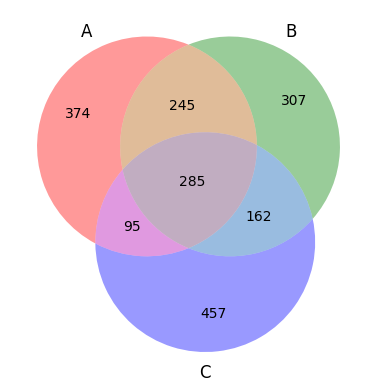

In [340]:
from matplotlib_venn import  venn2, venn3, venn3_circles

# Make a Basic Venn


# set1_={x for x in set1 if "MT-" not in x}
# set2_={x for x in set2 if "MT-" not in x}
# set3_={x for x in set3 if "MT-" not in x}


# venn2([set_,seta])#, ('cutoff=5', 'cutoff=4.7,5.3', 'cutoff=4.5,5.5'))
venn3([set0,set1,set2])#, ('cutoff=5', 'cutoff=4.7,5.3', 'cutoff=4.5,5.5'))
# plt.savefig('ig1_asc_ven.pdf')
plt.show()
# set1_={x for x in set1 if "MT-" not in x}
# set2_={x for x in set2 if "MT-" not in x}
# set3_={x for x in set3 if "MT-" not in x}

In [159]:
gsea=pd.read_csv('gsea_G.csv')
gsea=gsea.set_index('GS')
gsea=gsea[gsea['NES']>1.5]

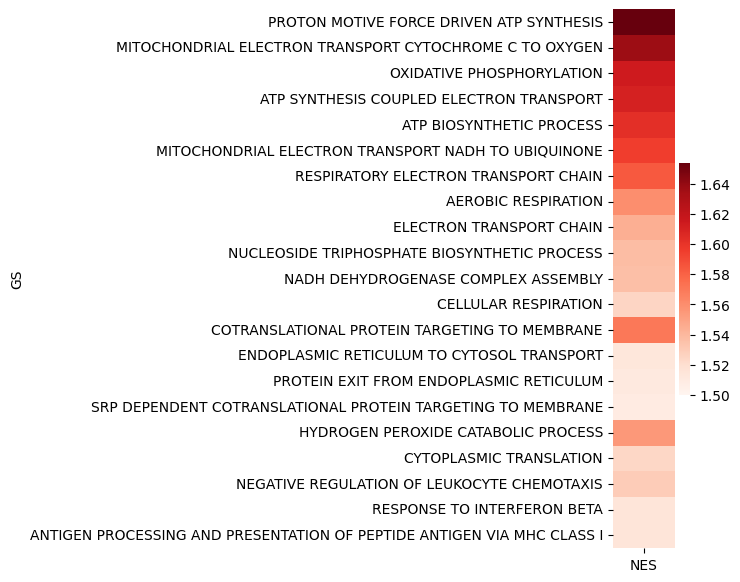

In [162]:
fig = plt.figure(figsize=(1,7))
# cmap=sns.diverging_palette(220,10,sep=30, n=7, as_cmap=True)
sns.heatmap(gsea, cmap='Reds', vmin=1.5)
# plt.savefig('gsea_G.pdf')
plt.show()

In [172]:
gsea=pd.read_csv('gsea_G_hallmark.csv')
gsea=gsea.set_index('NAME')
gsea=gsea[gsea['FDR q-val']<0.1]


In [178]:
gsea=gsea.NES

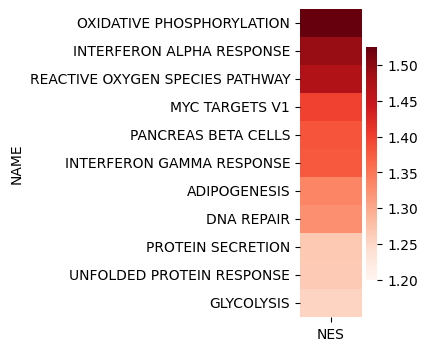

In [186]:
fig = plt.figure(figsize=(1,4))
heatmap=pd.DataFrame(gsea,  index=gsea.index)
# cmap=sns.diverging_palette(220,10,sep=30, n=7, as_cmap=True)
sns.heatmap(heatmap, cmap='Reds',vmin=1.2)
plt.savefig('gsea_G_hall.pdf')
plt.show()

In [40]:
rnaf=rna.copy()

In [41]:
sc.pp.filter_genes(rnaf, min_counts=100, min_cells=None, max_counts=None, max_cells=None, inplace=True, copy=False)


In [70]:
sc.pp.filter_genes(rnaf, min_counts=100, min_cells=None, max_counts=None, max_cells=None, inplace=True, copy=False)


AnnData object with n_obs × n_vars = 12892 × 10990
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'leiden', 'Ig', 'IgL', 'IgH', 'sec'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_counts'
    uns: 'IgH_colors', 'IgL_colors', 'Ig_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'sec_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [42]:
s0=rnaf[rnaf.obs["sample"]=='0']
s1=rnaf[rnaf.obs["sample"]=='1']
s2=rnaf[rnaf.obs["sample"]=='2']

In [43]:
genelist=rnaf.var.index


In [45]:
#
corr=pd.DataFrame(index=genelist,columns=['0','1','2'])
data0=s0
data1=s1
data2=s2
for i in genelist:
    
    corr.loc[i,'0']=pearsonr(data0.raw.obs_vector(i),data0.raw.obs_vector("IgG_ADT"))[0]
    corr.loc[i,'1']=pearsonr(data1.raw.obs_vector(i),data1.raw.obs_vector("IgG_ADT"))[0]
    corr.loc[i,'2']=pearsonr(data2.raw.obs_vector(i),data2.raw.obs_vector("IgG_ADT"))[0]

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [46]:
corr['mean'] = corr.iloc[:, 0:3].mean(axis=1)


In [47]:
corr=corr.sort_values(by='mean', ascending=False)

In [48]:
corr[:50]

,0,1,2,mean
IGHG3,0.383216,0.320938,0.332431,0.345528
IGHG1,0.305706,0.199019,0.298467,0.267731
IGHGP,0.269825,0.17285,0.186406,0.209694
SSR4,0.218224,0.215291,0.167512,0.200342
IGHG4,0.149638,0.135308,0.276346,0.187097
CD38,0.172443,0.159926,0.20735,0.179906
CYBA,0.217816,0.182757,0.129325,0.176633
TMBIM6,0.15695,0.192747,0.128644,0.159447
HLA-C,0.140701,0.211936,0.123618,0.158752
MZB1,0.203057,0.156749,0.097278,0.152361


In [49]:
# corr.to_csv("corr_all_100_raw.csv")

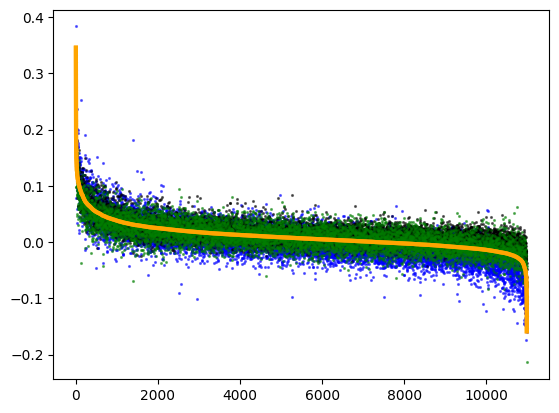

In [51]:
x=np.array(range(0,len(corr)))
y0=np.array(corr['0'])
y1=np.array(corr['1'])
y2=np.array(corr['2'])
y=np.array(corr['mean'])


plt.scatter(x, y0,c='b',s=1.5,alpha=0.3)
plt.scatter(x, y1,c='k',s=1.5,alpha=0.3)
plt.scatter(x, y2,c='g',s=1.5,alpha=0.3) 
plt.plot(x, y,'orange',linewidth=3) 
plt.show()

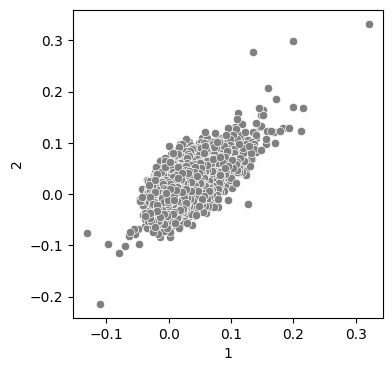

In [343]:

fig = plt.figure(figsize=(4,4))
sns.scatterplot(x='1',y='2',data=corr,c='grey')

# fig = plt.figure(figsize=(4,4))
# sns.scatterplot(x='0',y='2',data=corr,c='k')

plt.show()

In [120]:
corr.sort_values(by=['1','2'],ascending=False)[:35]

,0,1,2,mean
IGHG3,0.383216,0.320938,0.332431,0.345528
SSR4,0.218224,0.215291,0.167512,0.200342
HLA-C,0.140701,0.211936,0.123618,0.158752
PSME2,0.078217,0.199203,0.169903,0.149108
IGHG1,0.305706,0.199019,0.298467,0.267731
TMBIM6,0.15695,0.192747,0.128644,0.159447
CYBA,0.217816,0.182757,0.129325,0.176633
B2M,0.092043,0.178991,0.122281,0.131105
IGHGP,0.269825,0.17285,0.186406,0.209694
XBP1,0.17717,0.170995,0.098734,0.148966


In [324]:
rnaG=rnaf[rnaf.obs.Ig=='G']
Gd0=rnaG[rnaG.obs["sample"]=='0']
Gd1=rnaG[rnaG.obs["sample"]=='1']
Gd2=rnaG[rnaG.obs["sample"]=='2']

In [325]:
corrG=pd.DataFrame(index=genelist,columns=['0','1','2'])
data0=Gd0
data1=Gd1
data2=Gd2
for i in genelist:
    
    corrG.loc[i,'0']=pearsonr(data0.raw.obs_vector(i),data0.raw.obs_vector("IgG_ADT"))[0]
    corrG.loc[i,'1']=pearsonr(data1.raw.obs_vector(i),data1.raw.obs_vector("IgG_ADT"))[0]
    corrG.loc[i,'2']=pearsonr(data2.raw.obs_vector(i),data2.raw.obs_vector("IgG_ADT"))[0]

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [826]:
# corrG['mean'] = corrG.iloc[:, 0:3].mean(axis=1)

# corrG=corrG.sort_values(by='mean',ascending=False)
corr[:50]

,0,1,2,mean
IGHG3,0.383216,0.320938,0.332431,0.345528
IGHG1,0.305706,0.199019,0.298467,0.267731
IGHGP,0.269825,0.17285,0.186406,0.209694
SSR4,0.218224,0.215291,0.167512,0.200342
IGHG4,0.149638,0.135308,0.276346,0.187097
CD38,0.172443,0.159926,0.20735,0.179906
CYBA,0.217816,0.182757,0.129325,0.176633
TMBIM6,0.15695,0.192747,0.128644,0.159447
HLA-C,0.140701,0.211936,0.123618,0.158752
MZB1,0.203057,0.156749,0.097278,0.152361


In [338]:
corrG.to_csv('corrG_r.csv')

In [333]:
rnaG1=rnaf[rnaf.obs.IgH=='G1']
G1d0=rnaG1[rnaG1.obs["sample"]=='0']
G1d1=rnaG1[rnaG1.obs["sample"]=='1']
G1d2=rnaG1[rnaG1.obs["sample"]=='2']

In [337]:
corrG1=pd.DataFrame(index=genelist,columns=['0','1','2'])
data0=G1d0
data1=G1d1
data2=G1d2
for i in genelist:
    
    corrG1.loc[i,'0']=pearsonr(data0.raw.obs_vector(i),data0.raw.obs_vector("IgG_ADT"))[0]
    corrG1.loc[i,'1']=pearsonr(data1.raw.obs_vector(i),data1.raw.obs_vector("IgG_ADT"))[0]
    corrG1.loc[i,'2']=pearsonr(data2.raw.obs_vector(i),data2.raw.obs_vector("IgG_ADT"))[0]

/Users/ycheng/opt/anaconda3/envs/scanpy2/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [339]:
corrG1['mean'] = corrG1.iloc[:, 0:3].mean(axis=1)

corrG1=corrG1.sort_values(by='mean',ascending=False)
corrG1[:50]

,0,1,2,mean
IGHG3,0.159647,0.247696,0.25252,0.219954
IGHG1,0.157814,0.246273,0.25226,0.218782
SSR4,0.098261,0.250156,0.183902,0.177440
CYBA,0.122886,0.210376,0.06752,0.133594
NEAT1,0.087904,0.158655,0.12303,0.123196
IGHG2,0.116587,0.187253,0.06526,0.123034
HLA-C,0.09134,0.218529,0.051494,0.120454
SDC1,0.063226,0.108424,0.188461,0.120037
GADD45A,0.058,0.145201,0.144784,0.115995
MZB1,0.071377,0.173706,0.102324,0.115802


In [741]:
corr[corr.index=='CD19']

,0,1,2,mean
CD19,-0.087483,-0.001226,-0.019954,-0.036221


In [1260]:
flow=pd.read_csv('flow valid.csv',index_col=[0])
flow

,lo,med,hi
CD19,36.20,40.2,34.3
CD31,8.15,24.5,50.8
CD38,11.00,20.7,55.2
CD59,22.10,36.7,49.0
CD98,37.00,42.6,33.5
CD138,26.20,34.4,50.0


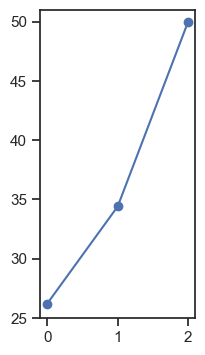

In [1267]:
fig=plt.figure(figsize=(2,4))
plt.plot([0,1,2],flow.iloc[5],'o-')
plt.ylim(25,51)
plt.show()

In [42]:
atl=pd.read_csv('rna_single_cell_type.tsv',sep='\t',index_col=[0])
atl

,Gene name,Cell type,nTPM
Gene,,,
ENSG00000000003,TSPAN6,Adipocytes,149.5
ENSG00000000003,TSPAN6,Alveolar cells type 1,6.1
ENSG00000000003,TSPAN6,Alveolar cells type 2,10.5
ENSG00000000003,TSPAN6,Astrocytes,13.9
ENSG00000000003,TSPAN6,B-cells,1.5
...,...,...,...
ENSG00000288695,AC064824.1,Syncytiotrophoblasts,0.0
ENSG00000288695,AC064824.1,T-cells,0.1
ENSG00000288695,AC064824.1,Theca cells,0.2


In [43]:
atls=pd.DataFrame(columns=atl.columns)
for gene in ['CD38','SDC1','IRF4','PRDM1','XBP1',"SUB1",'CYBA','ITM2C','CD59','TMEM59','MIF','CD52']:
        
    tmp=atl[atl['Gene name']==gene]
    tmp=tmp[(tmp['Cell type']=='B-cells')|(tmp['Cell type']=='Plasma cells')]
    atls=atls.append(tmp)


/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_29247/643860798.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  atls=atls.append(tmp)
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_29247/643860798.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  atls=atls.append(tmp)
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_29247/643860798.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  atls=atls.append(tmp)
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T/ipykernel_29247/643860798.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  atls=atls.append(tmp)
/var/folders/l2/wqv877ys4072cj6jczcxysq4cbkzd0/T

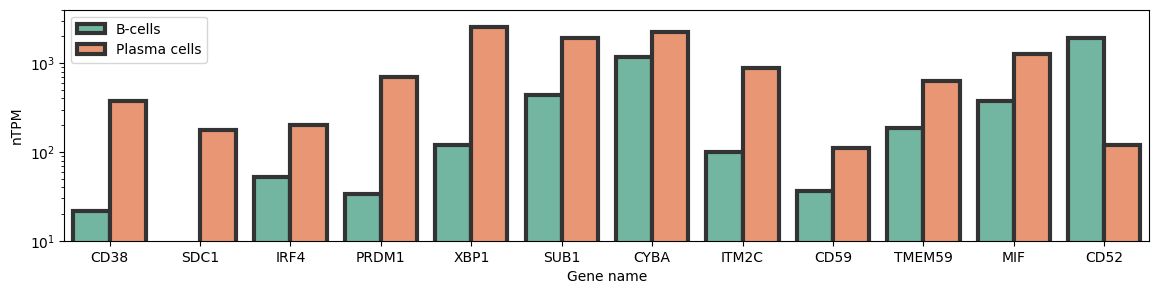

In [44]:
fig=plt.figure(figsize=(14,3))
sns.barplot(data=atls, x="Gene name", y="nTPM", hue="Cell type", palette='Set2',linewidth=3, edgecolor=".2",)
plt.yscale('log')
# plt.legend('',frameon=False)
plt.legend(loc='upper left')

plt.ylim(10,4000)
plt.show()

In [1382]:
genes_heatmap=list(corr.index[:40])+(list(corr.index[-6:]))
# genes_heatmap=['IGHG3','IGHG1','IGHGP','SSR4','CD38','CYBA','TMBIM6','HLA-C','MZB1','IGHG2','PSME2','XBP1','RPS27L','ITM2C',
#                'NEAT','CD59','FKBP11','PRDX4','GADD45A','ANKRD28','COX7A2','B2M','SPCS2','SUB1''TNFRSF13B','LMAN1','SEC61B'
#                "IGHA1",'IGHM']
genes_heatmap

['IGHG3',
 'IGHG1',
 'IGHGP',
 'SSR4',
 'IGHG4',
 'CD38',
 'CYBA',
 'TMBIM6',
 'HLA-C',
 'MZB1',
 'IGHG2',
 'PSME2',
 'XBP1',
 'RPS27L',
 'ITM2C',
 'NEAT1',
 'CD59',
 'FKBP11',
 'PRDX4',
 'GADD45A',
 'ANKRD28',
 'COX7A2',
 'B2M',
 'SPCS2',
 'SUB1',
 'LMAN1',
 'SEC61B',
 'HLA-B',
 'GSTP1',
 'PRDX1',
 'UQCRH',
 'TMEM59',
 'ATP5PF',
 'BHLHE41',
 'KRT10',
 'AC012236.1',
 'MIF',
 'RASSF6',
 'UBC',
 'NDUFA13',
 'IGHA2',
 'PTPN6',
 'TNFRSF13B',
 'CD52',
 'IGHA1',
 'IGHM']

In [504]:
d0=data[data.obs['sample']=='0']
d1=data[data.obs['sample']=='1']
d2=data[data.obs['sample']=='2']

s0s=d0.copy()
s1s=d1.copy()
s2s=d2.copy()

sc.pp.scale(s0s)
sc.pp.scale(s1s)
sc.pp.scale(s2s)

In [506]:
res0 = pd.DataFrame(columns=['hi','lo'], index=genes_heatmap)                                                                                                 

for clust in ['hi','lo']: 
    for i in genes_heatmap:
        res0[clust][i]  =float(s0s[s0s.obs['sec'].isin([clust]),:][:,i].X.mean(0))
res1 = pd.DataFrame(columns=['hi','lo'], index=genes_heatmap)                                                                                                 

for clust in ['hi','lo']: 
    for i in genes_heatmap:
        res1[clust][i]  =float(s1s[s1s.obs['sec'].isin([clust]),:][:,i].X.mean(0))

res2 = pd.DataFrame(columns=['hi','lo'], index=genes_heatmap)                                                                                                 
        
for clust in ['hi','lo']: 
    for i in genes_heatmap:
        res2[clust][i]  =float(s2s[s2s.obs['sec'].isin([clust]),:][:,i].X.mean(0))
        

        


In [507]:
res_=pd.DataFrame(index=genes_heatmap) 
res_['hi0']=res0['hi']
res_['hi1']=res1['hi']
res_['hi2']=res2['hi']
res_['lo0']=res0['lo']
res_['lo1']=res1['lo']
res_['lo2']=res2['lo']
res_ = res_.astype(float)

In [508]:
res_

,hi0,hi1,hi2,lo0,lo1,lo2
IGHG3,0.585226,0.479694,0.498365,-0.381698,-0.400504,-0.366744
IGHG1,0.433311,0.259264,0.468121,-0.324905,-0.309716,-0.319449
IGHGP,0.423682,0.253506,0.346815,-0.288176,-0.258798,-0.194425
SSR4,0.322223,0.257194,0.189079,-0.232954,-0.274051,-0.169376
IGHG4,0.180834,0.185701,0.424625,-0.177581,-0.162780,-0.290003
CD38,0.234927,0.194381,0.319767,-0.193416,-0.225020,-0.233120
CYBA,0.309345,0.196129,0.152303,-0.215473,-0.244657,-0.150151
TMBIM6,0.233857,0.239364,0.125590,-0.157321,-0.252732,-0.191585
HLA-C,0.182383,0.249749,0.099721,-0.147408,-0.291509,-0.172347
MZB1,0.285960,0.201479,0.100334,-0.212266,-0.203091,-0.111689


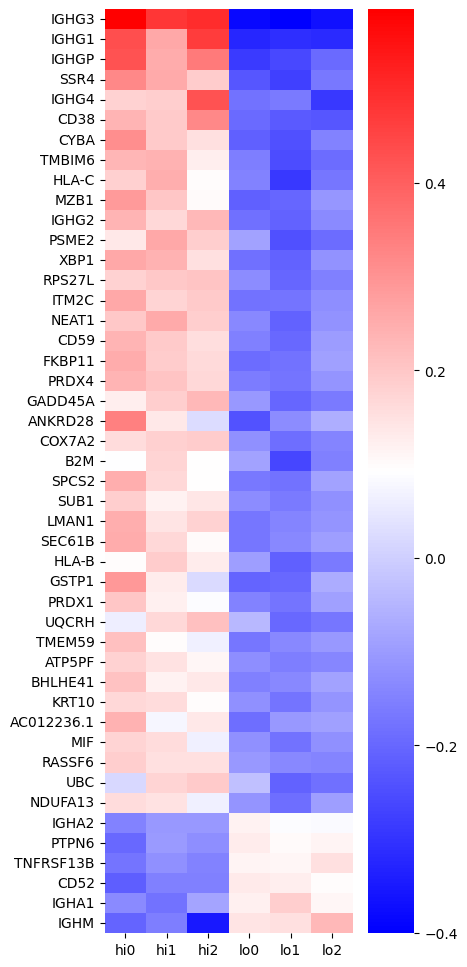

In [512]:
# heatmap=scipy.stats.zscore(res_,axis=1, ddof=1)
fig = plt.figure(figsize=(4,12))
cmap=sns.diverging_palette(220,10,sep=30, n=7, as_cmap=True,)
sns.heatmap(res_, cmap='bwr')
plt.show()

In [1489]:
rnaG=data[data.obs.Ig=='G']
rG0=rnaG[rnaG.obs["sample"]=='0']
rG1=rnaG[rnaG.obs["sample"]=='1']
rG2=rnaG[rnaG.obs["sample"]=='2']

In [1490]:
dfG0s=dfG0.copy()
dfG1s=dfG1.copy()
dfG2s=dfG2.copy()

sc.pp.scale(dfG0s)
sc.pp.scale(dfG1s)
sc.pp.scale(dfG2s)


In [1542]:
tmp=pd.read_csv('HALLMARK_MYC_TARGETS_V1.tsv',sep='\t')
genes_heatmap=list(tmp[tmp['CORE ENRICHMENT']=='Yes'].SYMBOL)[:44]

In [273]:
# genes_heatmap=list(dfG_ex0.names[:500])

In [1543]:
res0 = pd.DataFrame(columns=['hi','lo'], index=genes_heatmap)                                                                                                 

for clust in ['hi','lo']: 
    for i in genes_heatmap:
        res0[clust][i]  =float(dfG0s[dfG0.obs['sec'].isin([clust]),:][:,i].X.mean(0))
res1 = pd.DataFrame(columns=['hi','lo'], index=genes_heatmap)                                                                                                 

for clust in ['hi','lo']: 
    for i in genes_heatmap:
        res1[clust][i]  =float(dfG1s[dfG1.obs['sec'].isin([clust]),:][:,i].X.mean(0))

res2 = pd.DataFrame(columns=['hi','lo'], index=genes_heatmap)                                                                                                 
        
for clust in ['hi','lo']: 
    for i in genes_heatmap:
        res2[clust][i]  =float(dfG2s[dfG2.obs['sec'].isin([clust]),:][:,i].X.mean(0))
        

In [1544]:
res_=pd.DataFrame(index=genes_heatmap) 
res_['hi0']=res0['hi']
res_['hi1']=res1['hi']
res_['hi2']=res2['hi']
res_['lo0']=res0['lo']
res_['lo1']=res1['lo']
res_['lo2']=res2['lo']
res_ = res_.astype(float)


In [1512]:
res_

,hi0,hi1,hi2,lo0,lo1,lo2
COX7A2,0.080807,0.174257,0.142525,-0.087671,-0.225570,-0.155554
NDUFV2,0.082878,0.143514,0.140119,-0.089919,-0.185774,-0.152927
NDUFA4,0.062981,0.164470,0.046491,-0.068332,-0.212901,-0.050741
ATP5MC3,0.112167,0.135357,0.080579,-0.121696,-0.175215,-0.087945
COX5A,0.072045,0.131564,0.009601,-0.078165,-0.170306,-0.010479
...,...,...,...,...,...,...
HSPA9,0.021439,0.040942,0.038913,-0.023260,-0.052999,-0.042470
NQO2,0.034207,0.017172,0.055109,-0.037112,-0.022228,-0.060146
PRDX3,0.028449,0.038716,-0.003699,-0.030866,-0.050116,0.004037
MTX2,0.052921,0.030228,-0.029335,-0.057417,-0.039129,0.032017


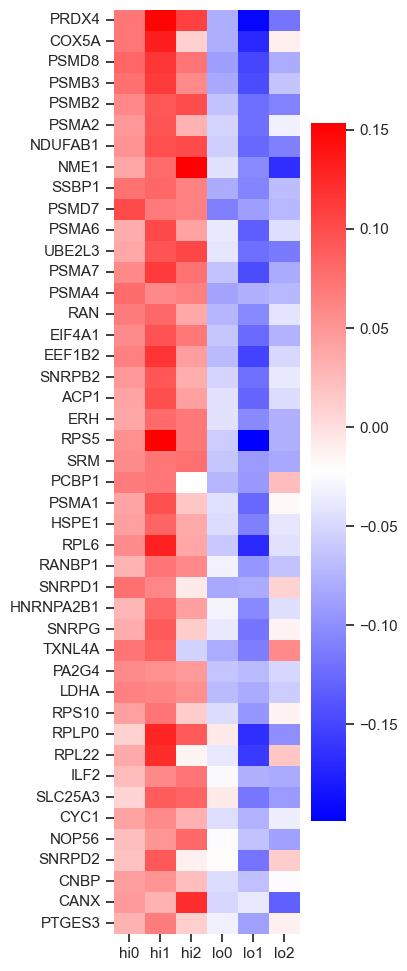

In [1545]:
# heatmap=scipy.stats.zscore(res_,axis=1, ddof=1)
fig = plt.figure(figsize=(3,12))
# data=pd.DataFrame(heatmap, columns=exp_cond, index=gene_labels)
cmap=sns.diverging_palette(220,10,sep=30, n=7, as_cmap=True,)
sns.heatmap(res_, cmap='bwr')
plt.show()